# Analysis of Successful Movies (Notebook 3)
* Benjamin Grossmann

This notebook goes through a little Exploratory Data Analysis (EDA) using TMDB data retrieved from Notebook 2.

# Initial Imports and Loads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open saved csv.gz files of from tmdb data
df_years = {}

for year in range(2000,2022):
    df_years[year] = pd.read_csv(f'Data/tmdb_data_{str(year)}.csv.gz', low_memory = False)

for year, dataframe in df_years.items():
    print(f"df_years[{year}] has shape {dataframe.shape}.")

df_years[2000] has shape (1197, 26).
df_years[2001] has shape (1279, 26).
df_years[2002] has shape (1225, 26).
df_years[2003] has shape (1271, 26).
df_years[2004] has shape (1419, 26).
df_years[2005] has shape (1607, 26).
df_years[2006] has shape (1802, 26).
df_years[2007] has shape (1844, 26).
df_years[2008] has shape (2079, 26).
df_years[2009] has shape (2358, 26).
df_years[2010] has shape (2585, 26).
df_years[2011] has shape (2908, 26).
df_years[2012] has shape (3198, 26).
df_years[2013] has shape (3440, 26).
df_years[2014] has shape (3639, 26).
df_years[2015] has shape (3708, 26).
df_years[2016] has shape (3946, 26).
df_years[2017] has shape (4308, 26).
df_years[2018] has shape (4527, 26).
df_years[2019] has shape (4690, 26).
df_years[2020] has shape (3731, 26).
df_years[2021] has shape (3590, 26).


In [3]:
# create empty dataframe for all years together
df = pd.DataFrame()

# concatentate each year to the  dataframe
for year, dataframe in df_years.items():
    df = pd.concat([df, dataframe], ignore_index=True)
    print(f"df has shape: {df.shape}")

df has shape: (1197, 26)
df has shape: (2476, 26)
df has shape: (3701, 26)
df has shape: (4972, 26)
df has shape: (6391, 26)
df has shape: (7998, 26)
df has shape: (9800, 26)
df has shape: (11644, 26)
df has shape: (13723, 26)
df has shape: (16081, 26)
df has shape: (18666, 26)
df has shape: (21574, 26)
df has shape: (24772, 26)
df has shape: (28212, 26)
df has shape: (31851, 26)
df has shape: (35559, 26)
df has shape: (39505, 26)
df has shape: (43813, 26)
df has shape: (48340, 26)
df has shape: (53030, 26)
df has shape: (56761, 26)
df has shape: (60351, 26)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60351 entries, 0 to 60350
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60351 non-null  object 
 1   adult                  60351 non-null  float64
 2   backdrop_path          37303 non-null  object 
 3   belongs_to_collection  3822 non-null   object 
 4   budget                 60351 non-null  float64
 5   genres                 60351 non-null  object 
 6   homepage               14654 non-null  object 
 7   id                     60351 non-null  float64
 8   original_language      60351 non-null  object 
 9   original_title         60351 non-null  object 
 10  overview               59003 non-null  object 
 11  popularity             60351 non-null  float64
 12  poster_path            54688 non-null  object 
 13  production_companies   60351 non-null  object 
 14  production_countries   60351 non-null  object 
 15  re

# Budget and Revenue

In [5]:
print(f"{df['budget'].isna().sum()} missing values for budget.")
print(f"{df['revenue'].isna().sum()} missing values for revenue.")

0 missing values for budget.
0 missing values for revenue.


In [6]:
df[['budget','revenue']].describe()

,budget,revenue
count,6.035100e+04,6.035100e+04
mean,3.134642e+06,8.237388e+06
std,1.613448e+07,6.115079e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.847246e+09


The minimum values in both columns are zeros...over 75% of the values in both columns are zeros. This means there must be movies that have zero for both budget and revenue. Since these movies can't provide any help with determining what makes a financially successful movie, I will have to remove them from the analysis. Let's see how many we are going to lose.

In [7]:
print(len(df.loc[(df['budget']==0) & (df['revenue']==0),:]), "movies with budget and revenue given as 0")
print(len(df.loc[(df['budget']>0) | (df['revenue']>0),:]), "movies with a known budget OR revenue greater than 0")
print(f"     ({len(df.loc[(df['budget']==0) & (df['revenue']>0),:])} with budget given as 0)")
print(f"     ({len(df.loc[(df['budget']>0) & (df['revenue']==0),:])} with revenue given as 0)")
print(f"     ({len(df.loc[(df['budget']>0) & (df['revenue']>0),:])} budget AND revenue greater than 0)")

46859 movies with budget and revenue given as 0
13492 movies with a known budget OR revenue greater than 0
     (2374 with budget given as 0)
     (6007 with revenue given as 0)
     (5111 budget AND revenue greater than 0)


In [8]:
df = df.loc[(df['budget']>0) | (df['revenue']>0),:]
df.shape

(13492, 26)

In [9]:
df[['budget','revenue']].describe()

,budget,revenue
count,1.349200e+04,1.349200e+04
mean,1.402155e+07,3.684662e+07
std,3.180953e+07,1.251939e+08
min,0.000000e+00,0.000000e+00
25%,6.000000e+03,0.000000e+00
50%,1.340000e+06,5.515300e+04
75%,1.200000e+07,1.364826e+07
max,3.800000e+08,2.847246e+09


There are still some zero values present in either column, but never both columns at the same time.

#  Certification Categories

I can split the data into certification categories. For each category I can find how many movies there are, the average budget, and average revenue.

In [10]:
certification_means = df\
    .groupby(['certification'],dropna=False)\
    .agg({'certification':'count','budget':'mean','revenue':'mean'})\
    .rename(columns={'certification':'count','budget':'mean budget','revenue':'mean revenue'})

certification_means

,count,mean budget,mean revenue
certification,,,
G,164,3.127868e+07,9.419958e+07
NC-17,36,2.642796e+06,5.069658e+06
NR,937,2.821325e+06,6.240467e+06
PG,781,4.196370e+07,1.266010e+08
PG-13,2000,4.015814e+07,1.171762e+08
PG-13,1,0.000000e+00,4.825184e+06
R,3194,1.484647e+07,3.114772e+07
R,1,4.000000e+07,1.492956e+08
Unrated,1,2.600000e+02,0.000000e+00


There are some issues with what look like duplicate string values for the certification.

In [11]:
df['certification'].unique()

array([nan, 'PG', 'R', 'G', 'PG-13', 'NR', 'NC-17', 'R ', 'PG-13 ',
       'Unrated'], dtype=object)

White spaces are the problem, so let's strip them off.

In [12]:
df['certification'] = df['certification'].str.strip()
df['certification'].unique()

array([nan, 'PG', 'R', 'G', 'PG-13', 'NR', 'NC-17', 'Unrated'],
      dtype=object)

OK, that's better.

In [13]:
certification_means = df\
    .groupby(['certification'],dropna=False)\
    .agg({'certification':'count','budget':'mean','revenue':'mean'})\
    .rename(columns={'certification':'count','budget':'mean budget','revenue':'mean revenue'})

certification_means

,count,mean budget,mean revenue
certification,,,
G,164,3.127868e+07,9.419958e+07
NC-17,36,2.642796e+06,5.069658e+06
NR,937,2.821325e+06,6.240467e+06
PG,781,4.196370e+07,1.266010e+08
PG-13,2001,4.013807e+07,1.171200e+08
R,3195,1.485434e+07,3.118470e+07
Unrated,1,2.600000e+02,0.000000e+00
NaN,0,3.255580e+06,6.709800e+06


Since we are only interested in G/PG/PG-13/R, the other ratings can be dropped.

In [14]:
df = df.loc[ (df['certification']=='G') |
       (df['certification']=='PG') |
       (df['certification']=='PG-13') |
       (df['certification']=='R')]

In [15]:
certification_means = df\
    .groupby(['certification'],dropna=False)\
    .agg({'certification':'count','budget':'mean','revenue':'mean'})\
    .rename(columns={'certification':'count','budget':'mean budget','revenue':'mean revenue'})

certification_means

,count,mean budget,mean revenue
certification,,,
G,164,3.127868e+07,9.419958e+07
PG,781,4.196370e+07,1.266010e+08
PG-13,2001,4.013807e+07,1.171200e+08
R,3195,1.485434e+07,3.118470e+07


Scientific notation isn't always easy to read quickly. Let's see those numbers in another format.

In [16]:
for col in certification_means.columns:
    print(certification_means[col].apply(lambda x: '{:>11,.0f}'.format(x)),"\n")

certification
G                164
PG               781
PG-13          2,001
R              3,195
Name: count, dtype: object 

certification
G         31,278,677
PG        41,963,696
PG-13     40,138,069
R         14,854,342
Name: mean budget, dtype: object 

certification
G         94,199,577
PG       126,601,020
PG-13    117,120,011
R         31,184,699
Name: mean revenue, dtype: object 



We can see how these financial numbers compare in the graphs below.

# Visualizations

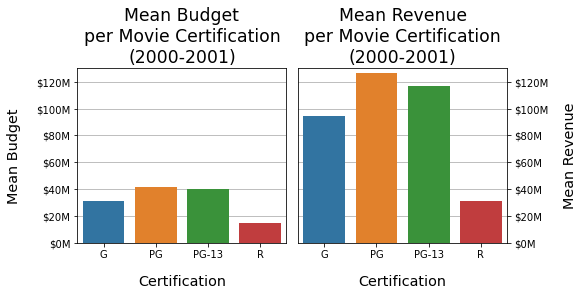

In [17]:
from matplotlib.ticker import FuncFormatter

# define the format
def mdollar(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"${x*1e-6:,.0f}M"
# create the formatter

mdollar_formatter = FuncFormatter(mdollar)

# since I want to use the certification as a plotted category,
# I will move it from the index to its own column
certification_means = certification_means.reset_index()

fig, axe = plt.subplots(ncols = 2, figsize=(8,4),constrained_layout=True)

sns.barplot(ax = axe[0],
            data = certification_means,
            x = 'certification',
            y = 'mean budget',
           zorder=3)
sns.barplot(ax = axe[1],
            data = certification_means,
            x = 'certification',
            y = 'mean revenue',
           zorder=3)
axe[0].set_xlabel('Certification', labelpad=15, fontsize='x-large')
axe[0].set_ylabel('Mean Budget', labelpad=15, fontsize='x-large')
axe[0].yaxis.set_major_formatter(mdollar_formatter)
axe[1].set_xlabel('Certification', labelpad=15, fontsize='x-large')
axe[1].set_ylabel('Mean Revenue', labelpad=15, fontsize='x-large')
axe[1].yaxis.set_major_formatter(mdollar_formatter)
axe[1].yaxis.set_label_position('right')
axe[1].yaxis.tick_right()
axe[0].set_title('Mean Budget\nper Movie Certification\n(2000-2001)', fontsize='xx-large')
axe[1].set_title('Mean Revenue\nper Movie Certification\n(2000-2001)', fontsize='xx-large')
axe[0].yaxis.grid(True,zorder=1)
axe[1].yaxis.grid(True,zorder=1)
axe[0].set(ylim=(0,130000000))
axe[1].set(ylim=(0,130000000))
plt.show()

We can also see a comparison of the revenue to the budget of each movie individually.

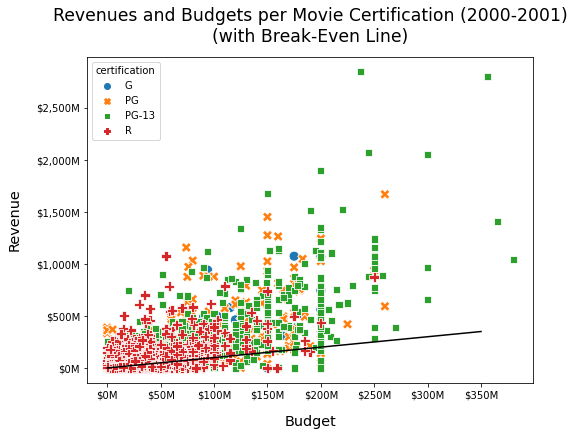

In [18]:
plt.figure(figsize=(8,6))
certification_filter = (df['certification']=='G')|(
    df['certification']=='PG')|(
    df['certification']=='PG-13')|(
    df['certification']=='R')

axe = sns.scatterplot(data = df[certification_filter].sort_values(by='certification'),
                      x = 'budget',
                      y = 'revenue',
                      hue='certification',
                      style='certification',
                      s=100)
axe.set_xlabel('Budget', labelpad=15, fontsize='x-large')
axe.set_ylabel('Revenue', labelpad=15, fontsize='x-large')
axe.plot([0,350000000],[0,350000000],color='black')
# axe.plot([0,140000000],[0,280000000])
# axe.plot([0,140000000],[0,420000000])
# axe.plot([0,140000000],[0,590000000])
axe.xaxis.set_major_formatter(mdollar_formatter)
axe.yaxis.set_major_formatter(mdollar_formatter)
axe.set_title('Revenues and Budgets per Movie Certification (2000-2001)\n(with Break-Even Line)', fontsize='xx-large',pad=15)
# axe.set(xscale='log',yscale='log')
plt.show()

In [19]:
df['r_to_b_ratio']=df['revenue']/df['budget']

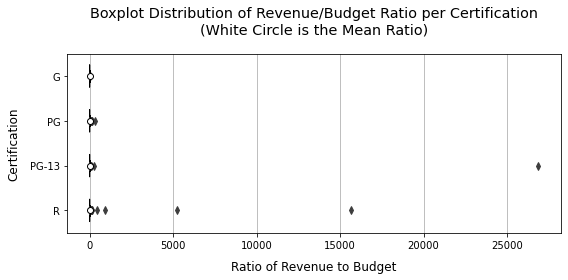

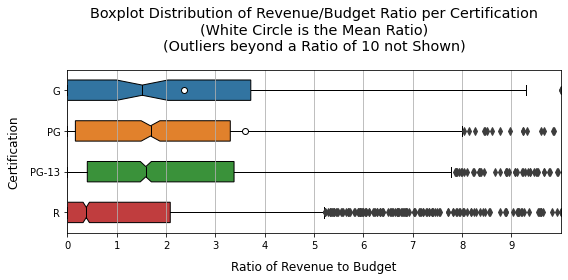

In [20]:
plt.figure(figsize=(8,4),tight_layout=True)
# sns.set(style="white")
axe = sns.boxplot(data=df[certification_filter][df[certification_filter]['budget']!=0].sort_values(by='certification') ,x="r_to_b_ratio",y="certification", notch=True,\
            width=0.5,\
            linewidth=1,\
            showmeans=True,\
            dodge=False,\
            flierprops=dict(marker="d",color="black"),\
            capprops=dict(color="black"),\
            whiskerprops=dict(color="black"),\
            boxprops=dict(edgecolor="black"),\
            medianprops=dict(color="black"),\
            meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"))
# axe.set_xlim(0,10);
# axe.set_xticks(range(0,10,1));
axe.tick_params(bottom=True,left=True)
axe.set_title("Boxplot Distribution of Revenue/Budget Ratio per Certification\n(White Circle is the Mean Ratio)",fontsize="x-large",pad=20);
axe.set_xlabel("Ratio of Revenue to Budget",fontsize="large",labelpad=10);
axe.set_ylabel("Certification",fontsize="large",labelpad=10);
axe.xaxis.grid(True);
# axe.set(xscale='log')
plt.show()

plt.figure(figsize=(8,4),tight_layout=True)
# sns.set(style="white")
axe = sns.boxplot(data=df[certification_filter][df[certification_filter]['budget']!=0].sort_values(by='certification') ,x="r_to_b_ratio",y="certification", notch=True,\
            width=0.5,\
            linewidth=1,\
            showmeans=True,\
            dodge=False,\
            flierprops=dict(marker="d",color="black"),\
            capprops=dict(color="black"),\
            whiskerprops=dict(color="black"),\
            boxprops=dict(edgecolor="black"),\
            medianprops=dict(color="black"),\
            meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"))
axe.set_xlim(0,10);
axe.set_xticks(range(0,10,1));
axe.tick_params(bottom=True,left=True)
axe.set_title("Boxplot Distribution of Revenue/Budget Ratio per Certification\n(White Circle is the Mean Ratio)\n(Outliers beyond a Ratio of 10 not Shown)",fontsize="x-large",pad=20);
axe.set_xlabel("Ratio of Revenue to Budget",fontsize="large",labelpad=10);
axe.set_ylabel("Certification",fontsize="large",labelpad=10);
axe.xaxis.grid(True);
# axe.set(xscale='log')
plt.show()

Although most movies being examined in this data set have ratios greater than 1 (revenue is greater than budget), the R certification as a sub-group of movies leans the other way.

Most movies also have a smaller ratio than the mean value in their certification category, except the G certification sub-group.  This is because the mean values are being skewed by extreme outliers.

# Saving the Merged Data

In [21]:
df.to_csv('Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)